In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [3]:
data = "C:/Users/HP/Downloads/Diabetes_dataset.csv"

In [4]:
df = pd.read_csv(data, sep = ";")
display(df)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [40]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [24]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [26]:
df.shape

(520, 17)

## This dataset contains  520  observations with  17  characteristics.

In [30]:
# Get the number of missing data points per column
missing_values_count = df.isnull().sum()
# Look at the missing points
missing_values_count.to_frame()

,0
age,0
gender,0
polyuria,0
polydipsia,0
sudden_weight_loss,0
weakness,0
polyphagia,0
genital_thrush,0
visual_blurring,0
itching,0


## Data do not have any missing values.

In [5]:
ndf = df

In [6]:
ndf = ndf.drop('class', axis = 1)

In [7]:
ndf['male'] = ndf['gender']
ndf['female'] = ndf['gender']

In [8]:
def male(x):
    return 1 if x == "Male" else 0

def female(x):
    return 1 if x == "Female" else 0

male_list = list(ndf['male'])
female_list = list(ndf['female'])

In [9]:
nmale_list = [male(g) for g in male_list]
nfemale_list = [female(g) for g in female_list]

In [10]:
ndf['male'] = nmale_list
ndf['female'] = nfemale_list

In [11]:
ndf = ndf.drop('gender', axis = 1)

In [12]:
ndf['class'] = df['class']
display(ndf)

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,male,female,class
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,1
516,48,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1
517,58,1,1,1,1,1,0,1,0,0,0,1,1,0,1,0,1,1
518,32,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0


In [13]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   polyuria            520 non-null    int64
 2   polydipsia          520 non-null    int64
 3   sudden_weight_loss  520 non-null    int64
 4   weakness            520 non-null    int64
 5   polyphagia          520 non-null    int64
 6   genital_thrush      520 non-null    int64
 7   visual_blurring     520 non-null    int64
 8   itching             520 non-null    int64
 9   irritability        520 non-null    int64
 10  delayed_healing     520 non-null    int64
 11  partial_paresis     520 non-null    int64
 12  muscle_stiffness    520 non-null    int64
 13  alopecia            520 non-null    int64
 14  obesity             520 non-null    int64
 15  male                520 non-null    int64
 16  female              520 non-null    int64
 1

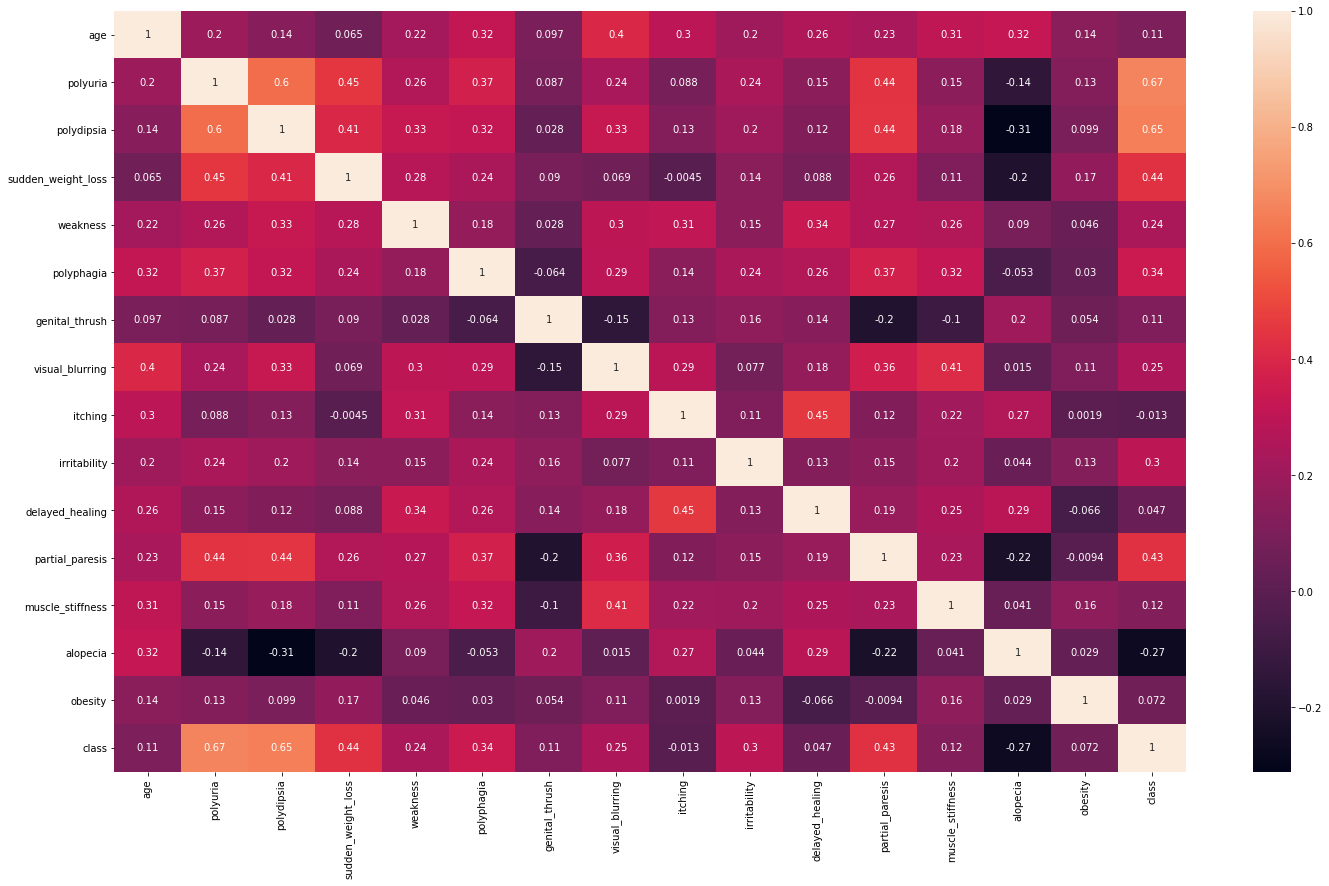

In [37]:
plt.figure(figsize=(24, 14))
sns.heatmap(df.corr(), annot=True);

In [32]:
df.corr()['class'].sort_values(ascending=False) # the correlation

class                 1.000000
polyuria              0.665922
polydipsia            0.648734
sudden_weight_loss    0.436568
partial_paresis       0.432288
polyphagia            0.342504
irritability          0.299467
visual_blurring       0.251300
weakness              0.243275
muscle_stiffness      0.122474
genital_thrush        0.110288
age                   0.108679
obesity               0.072173
delayed_healing       0.046980
itching              -0.013384
alopecia             -0.267512
Name: class, dtype: float64

## Above are the features that associate with diabetic risk.

In [34]:
# checking skewness value
skew_value = df.skew().sort_values(ascending=False)
skew_value

obesity               1.769420
genital_thrush        1.334223
irritability          1.206305
alopecia              0.657608
muscle_stiffness      0.517893
sudden_weight_loss    0.336359
age                   0.329359
partial_paresis       0.280426
polydipsia            0.209426
visual_blurring       0.209426
polyphagia            0.178134
delayed_healing       0.162537
itching               0.054022
polyuria              0.015430
weakness             -0.352476
class                -0.475715
dtype: float64

## If the skewness value lies between -0.5 to 0.5  then it is normal otherwise skewed. There are many features that are skewed.

In [15]:
drops = ["itching", "delayed_healing", "obesity"]
for item in drops:
    ndf = ndf.drop(f"{item}", axis = 1)
    
display(df)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


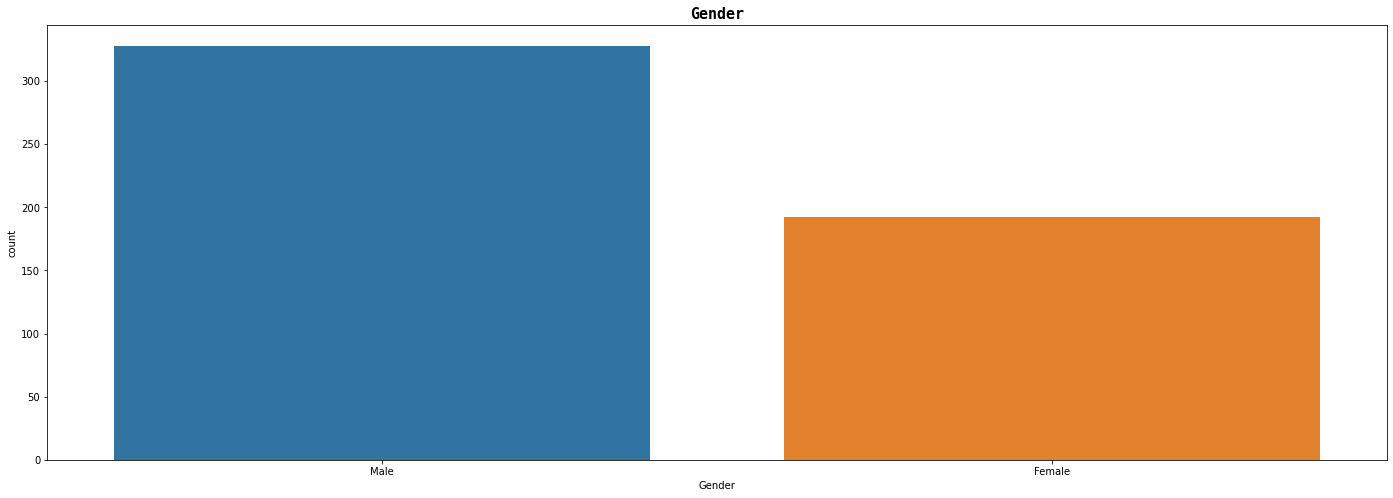

In [35]:
plt.figure(figsize=(24, 8)) 
sns.countplot(x='gender', data=df)
plt.title('Gender', fontname='monospace', fontweight='bold', fontsize=15)
plt.xlabel('Gender');

## Most distribution is showing male. This shows that men are more likely to develop diabetes than women.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


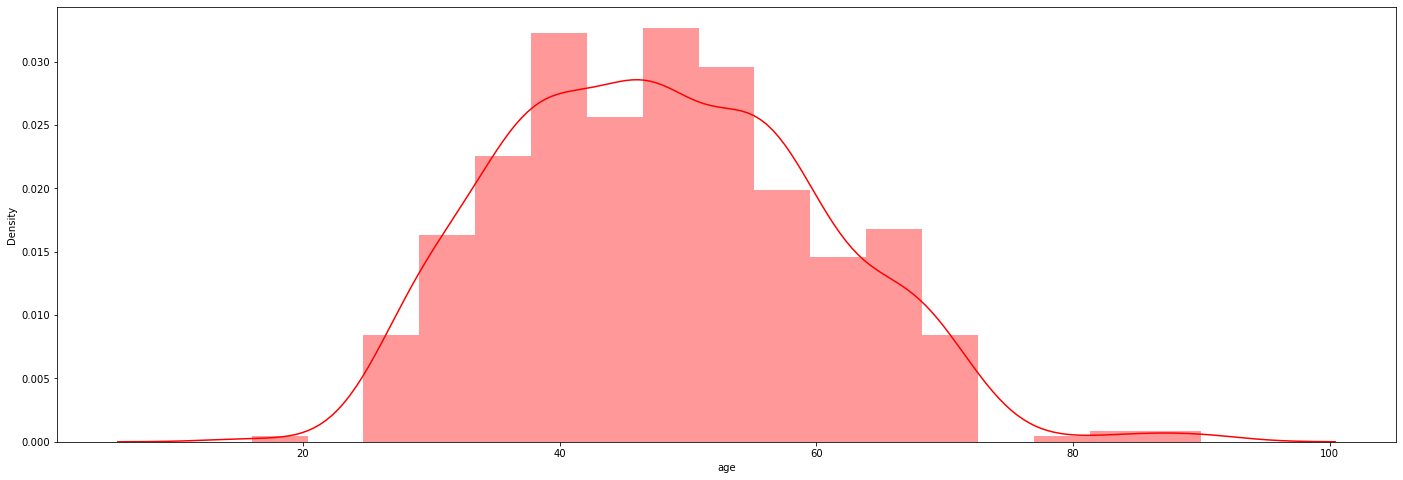

In [39]:
plt.figure(figsize=(24, 8))
sns.distplot(df['age'], kde=True, color="red");

## This shows that most people have diabetes in the age group of 25 to 75 but children, teens, and young adults are also developing it.

## Random Forest Classifier

In [ ]:
x = ndf.drop("class", axis = 1)
y = ndf["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [18]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)

RandomForestClassifier()

In [19]:
randomforest_test = randomforest.predict(x_test)

In [20]:
randomforest_r2 = metrics.r2_score(y_test, randomforest_test)
randomforest_error = metrics.mean_squared_error(y_test, randomforest_test)

print(randomforest_r2)
print(randomforest_error)

0.9614814814814815
0.009615384615384616


## This model have an accuracy of 80%+, pretty stable at 90%+.

## The error here is very low

In [21]:
comparison_df = pd.DataFrame()
comparison_df["Confirmed Diabetes"] = y_test
comparison_df["Predicted Diabetes"] = randomforest_test
comparison_df = comparison_df.reset_index(drop = True)
comparison_df.head()

,Confirmed Diabetes,Predicted Diabetes
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1


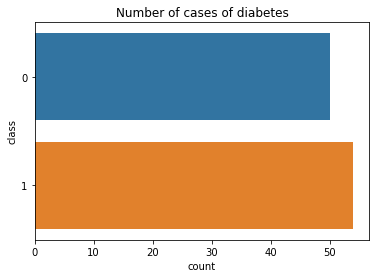

In [22]:
plt.title("Number of cases of diabetes")
sns.countplot(data = comparison_df, y = y_test)
plt.show()

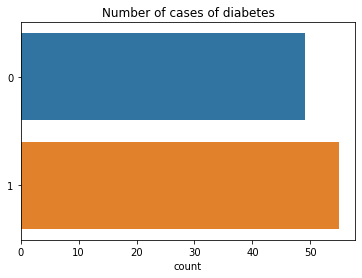

In [23]:
plt.title("Number of cases of diabetes")
sns.countplot(data = comparison_df, y = randomforest_test)
plt.show()